In [1]:
import numpy as np
import pickle
import os
import pandas as pd
from keras.models import load_model
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,RMSprop
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.metrics as metrics
import glob
import cv2
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.applications import VGG16
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import array_to_img,img_to_array,load_img

For predicting multiple Images

Folder path: New_made_dataset/Apple___Apple_scab/
Model Name :All_models/disease_models/Apple___Apple_scab.h5
Found 12072 files belonging to 2 classes.
1/1 [==============================] - 0s 11ms/step


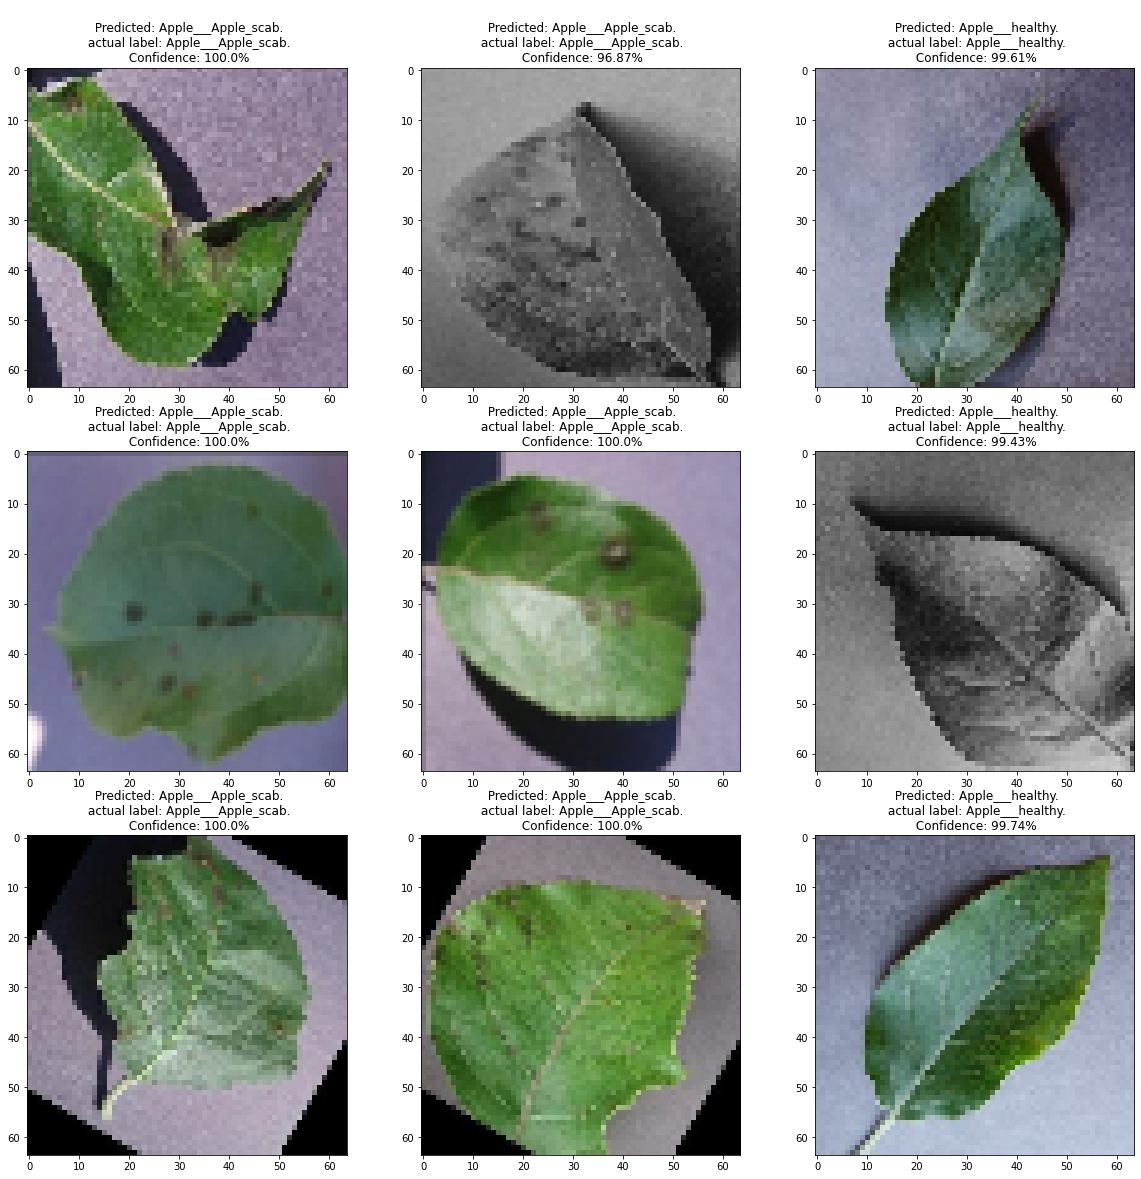

In [20]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds
data_dir = input('Folder path: ')
model = input('Model Name :')

model = tf.keras.models.load_model(model)
# data_dir = 'New_made_dataset/Apple___Apple_scab/'
train_data = tf.keras.preprocessing.image_dataset_from_directory(data_dir, batch_size=32,
    image_size=(64, 64),
    shuffle=True,)

train_generator, validation_generator, test_ds = get_dataset_partitions_tf(train_data)
model.evaluate(test_ds)
import numpy as np
plt.figure(figsize=(20, 20))
for images_batch, labels_batch in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        first_image = images_batch[i].numpy().astype('uint8')
        first_label = labels_batch[i].numpy()
        batch_prediction = model.predict(images_batch)
        confidence = round(100 * (np.max(batch_prediction[i])), 2)
        plt.imshow(first_image)
        predicted_class = class_names[np.argmax(batch_prediction[i])]
        plt.title(f"\n Predicted: {predicted_class}.\n actual label: {class_names[first_label]}.\n Confidence: {confidence}%")


For predicting one image

Give the image Path: New_made_dataset/Apple___Apple_scab/Apple___Apple_scab/0a6812de-7416-4ffe-aba9-307599a02c84___FREC_Scab 2973_new30degFlipLR_grey.jpg
1/1 [==============================] - 0s 12ms/step


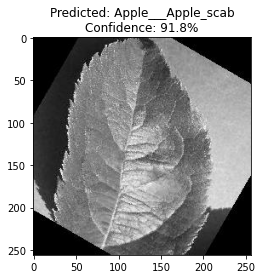

In [18]:
# Define a function to preprocess the image
def preprocess_image(image_path):
    # Load the image from the file path
    img = load_img(image_path, target_size=(64, 64))  # Assuming your model expects 64x64 input
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to the range [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Provide the path to the image you want to predict
image_path = input("Give the image Path: ")
# Preprocess the image
input_image = preprocess_image(image_path)

# Make a prediction
predictions = model.predict(input_image)


# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the corresponding class name
predicted_class = class_names[predicted_class_index]

# Get the confidence score for the prediction
confidence = round(100 * np.max(predictions), 2)

# Display the prediction result
plt.imshow(load_img(image_path))  # Show the image
plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence}%")
plt.show()